# Data Cleaning in Pandas
Prepared by:
Nyalleng Moorosi - April 10th 2018

 In this practical we will learn how to do exploratory data analysis using Pandas

In [26]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline  

** Read in the CSV file **

In [27]:
listings = pd.read_csv('listings2.csv')

In [29]:
desc = listings['description']

In [35]:
desc[5:15]

5     Lovely family home built in 1895!  In very goo...
6     This house is move-in ready!Near the hub of Th...
7     TIMELESS, TRANQUIL ELEGANCEThis 380m2 single s...
8     EXCLUSIVELY ENTHRALLINGThis 380m2 residence is...
9     You will fall in love with this home:  smart, ...
10    Build it up, or tear it down - you have 1239 s...
11    Thatch roofed, multi level home nestled in an ...
12    This is a stunning five bedroom, family house ...
13    EXCLUSIVE MANDATE .Exceptionally well maintain...
14    - Maximise your capital  investment,excellent ...
Name: description, dtype: object

In [38]:
l = ['r', 't', 7, 'y']
l[0:3][:1]

['r']

In [39]:
s = 'Nyalleng'
s[2:4]

'al'

In [40]:
[x for x in l if x == 7]

[7]

In [41]:
for x in l:
    print x

r
t
7
y


**Have a look at the data**

In [42]:
for i in range(0,len(l)):
    print l[i]

r
t
7
y


In [45]:
listings.shape

(8850, 9)

In [44]:
listings[100:103]

,Unnamed: 0,bathrooms,bedrooms,description,garage,location,other,price,title
100,100,1,1,Dear Property buyerBargain For Sale at the bes...,31 Cum Laude 560 Grosvenor Street,560-grosvenor-street,"[31 Cum Laude 560 Grosvenor Street, Andre Kelb...",R 659 000,Apartment in Hatfield
101,101,1,1,Dear Property buyer.Hatfield apartment For Sal...,13 Du South 1195 South Street,1195-south-street,"[13 Du South 1195 South Street, Andre Kelbrick]",R 699 000,Apartment in Hatfield
102,102,2 Villa Magnolia 1232 Park Street,1,Dear Property buyer.Hatfield Up-Market Flat Fo...,Andre Kelbrick,1232-park-street,[Andre Kelbrick],R 699 000,Studio Apartment in Hatfield


In [48]:
interesting = listings[['bedrooms','bathrooms','price']]
interesting[:5]

,bedrooms,bathrooms,price
0,3,2,R 1 390 000
1,4,3,R 3 000 000
2,4,3,R 3 450 000
3,3,3,R 3 500 000
4,2,1,R 1 100 000


In [51]:
listings['bedrooms'] = pd.to_numeric(listings.bedrooms, downcast='float', errors='coerce')

** Combining conditions **

In [57]:
listings[(listings['bedrooms'] == 5) | (listings['location'] == 'lukasrand')][:2]

,Unnamed: 0,bathrooms,bedrooms,description,garage,location,other,price,title
10,10,4,5.0,"Build it up, or tear it down - you have 1239 s...",Pets,lukasrand,"[Pets, Pool, Staff Quarters, Patio]",R 3 120 000,House in Lukasrand
12,12,3,5.0,"This is a stunning five bedroom, family house ...",Pool,waterkloof-heights,"[Pool, Staff Quarters, Patio, BIC, For Sale By...",R 3 800 000,House in Waterkloof Heights


In [61]:
listings[listings['bedrooms'] == 41]

,Unnamed: 0,bathrooms,bedrooms,description,garage,location,other,price,title
1446,1446,12,41.0,Commercial residential property situated in Pr...,2,13-bourke-street,"[2, Pool, Access Gate, Staff Quarters, Elec. F...",R 10 570 000,Flat in Sunnyside
1470,1470,12,41.0,Commercial residential property situated in Pr...,2,13-bourke-street,"[2, Pool, Access Gate, Staff Quarters, Elec. F...",R 10 570 000,Flat in Sunnyside


** Grouping by attribute**

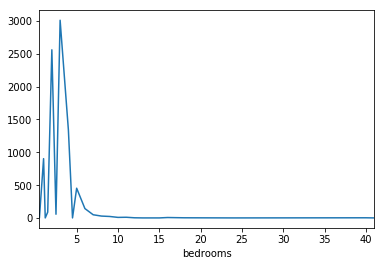

In [62]:
listings.groupby('bedrooms').agg('count')['title'].plot()

In [52]:
listings[listings['bedrooms'] > 4][:3]

,Unnamed: 0,bathrooms,bedrooms,description,garage,location,other,price,title
10,10,4,5.0,"Build it up, or tear it down - you have 1239 s...",Pets,lukasrand,"[Pets, Pool, Staff Quarters, Patio]",R 3 120 000,House in Lukasrand
12,12,3,5.0,"This is a stunning five bedroom, family house ...",Pool,waterkloof-heights,"[Pool, Staff Quarters, Patio, BIC, For Sale By...",R 3 800 000,House in Waterkloof Heights
18,18,3,5.0,WATERKLOOF RIDGE Exclusive Mandate.If it is sp...,5,waterkloof-ridge,"[5, Pool, Staff Quarters, Chris Yeomans]",R 5 500 000,House in Waterkloof Ridge


** Have a look at the datatypes in the the data frame **

In [5]:
listings.dtypes

Unnamed: 0      int64
bathrooms      object
bedrooms       object
description    object
garage         object
location       object
other          object
price          object
title          object
dtype: object

In [12]:
listings['bedrooms'].mean()

2.9217134

** Transform your data

In [9]:
listings['bedrooms'] = pd.to_numeric(listings.bedrooms, downcast='float', errors='coerce')

In [10]:
listings[:3]

,Unnamed: 0,bathrooms,bedrooms,description,garage,location,other,price,title
0,0,2,3.0,This is a corner unit with a bigger garden tha...,1,559-wipstert-street,"[1, Pets, Alarm, Access Gate, Elec. Fencing, 4...",R 1 390 000,Duplex in Monument Park
1,1,3,4.0,The Main dwelling is accessed by means of a pe...,2,257-muckleneuk-street,"[2, Alarm, Access Gate, BIC, 257 Muckleneuk St...",R 3 000 000,House in New Muckleneuk
2,2,3,4.0,EXCLUSIVE MANDATEThis dreamy single storey hom...,2,262-indus,"[2, Pool, Elec. Fencing, Garden Cott., Patio, ...",R 3 450 000,House in Waterkloof Ridge


** Problem 1 ** : Write a lambda function that appends on to the dataframe a new column that contains the size of the description for each listing
--To set a new column do ** listings['desc_len']  = ..**

**Problem 2 ** Modify all other coloums that should be numeric

### Do some summary statistics
    -- extend to mean and average

In [89]:
listings['bedrooms'].mean()

2.921713352203369

### Grouping and further counting

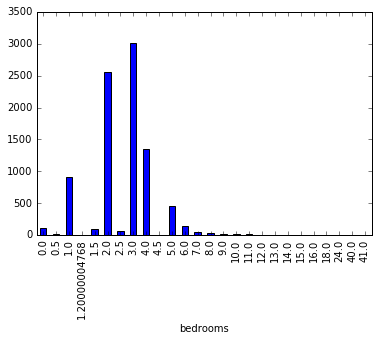

In [41]:
listings.groupby('bedrooms').agg('count')['price'].plot(kind = 'bar')

** Problem 3: ** Find the location with the most expensive housing 

** Select certain features of interest **

In [96]:
large_houses = listings[listings['bedrooms'] > 10]

In [97]:
large_houses[:3]

,Unnamed: 0,bathrooms,bedrooms,description,garage,location,other,price,title
203,203,6,11.0,An eleven bedroom house in a well situated lo...,Hayford Obeng,hatfield,[Hayford Obeng],R 4 500 000,House in Hatfield
227,227,6,11.0,An eleven bedroom house in a well situated lo...,Hayford Obeng,hatfield,[Hayford Obeng],R 4 500 000,House in Hatfield
244,244,9,11.0,Family home / Guesthouse or Excellent Investme...,2,eastwood,"[2, Pets, Alarm, Access Gate, Staff Quarters, ...",R 5 475 000,House in Eastwood


** Problem 4: ** Find Houses that have the same number of bedrooms as bathrooms

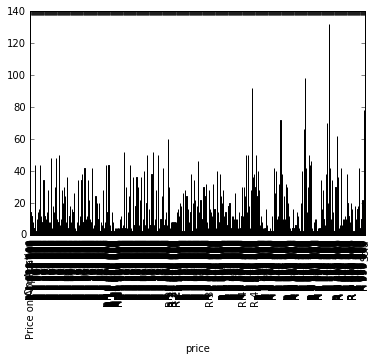

In [98]:
listings.groupby('price').agg('count')['bedrooms'].plot(kind = 'bar')

#### transforming a value using a helper function

In [64]:
listings['price'] = listings['price'].apply(lambda x: clean_price(x))

In [66]:
listings[:1]

,Unnamed: 0,bathrooms,bedrooms,description,garage,location,other,price,title
0,0,2,3.0,This is a corner unit with a bigger garden tha...,1,559-wipstert-street,"[1, Pets, Alarm, Access Gate, Elec. Fencing, 4...",1390000.0,Duplex in Monument Park


In [63]:
def clean_price(x):
    try:
        return float(x[1:].replace(' ',''))
    except ValueError:
        return 0

In [16]:
prices[:4]

[1390000.0, 3000000.0, 3450000.0, 3500000.0]

In [18]:
np.mean(prices)

1934731.84519774

In [19]:
s = 'Nyalleng'

In [20]:
s[1:]

'yalleng'

In [25]:
s[3]

'l'

In [22]:
s[2:5]

'all'

In [23]:
len(s)

8

In [24]:
for j in s:
    print j

N
y
a
l
l
e
n
g
